## Module Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge



from sklearn.metrics import r2_score, mean_squared_error

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

import seaborn as sns
import matplotlib.pyplot as plt


## Loading in our cleaned and feature engineered testing data

In [6]:
pwd

'/Users/Asia/Desktop/DSIR/Submissions/projects/project_2-master/Code'

In [8]:
df = pd.read_csv('../datasets/ames_train.csv')

In [9]:
df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,alley,lot_shape,land_contour,lot_config,...,exter_qual2,exter_cond2,remodel_year,remodel_yn,fireplace_yn,pool_yn,Basement_yn,garage_yn,house_sf_x_overall_qual,overall_qual_x_overall_cond
0,109,533352170,60,RL,72.0,13517,NaN,IR1,Lvl,CulDSac,...,4,3,29,1,0,0,1,1,13224.0,48
1,544,531379050,60,RL,43.0,11492,NaN,IR1,Lvl,CulDSac,...,4,3,1,1,1,0,1,1,21245.0,35
2,153,535304180,20,RL,68.0,7922,NaN,Reg,Lvl,Inside,...,3,4,54,1,0,0,1,1,10570.0,35
3,318,916386060,60,RL,73.0,9802,NaN,Reg,Lvl,Inside,...,3,3,1,1,0,0,1,1,9140.0,25
4,255,906425045,50,RL,82.0,14235,NaN,IR1,Lvl,Inside,...,3,3,93,1,0,0,1,1,12726.0,48


# Viewing our target variable, Sale price.

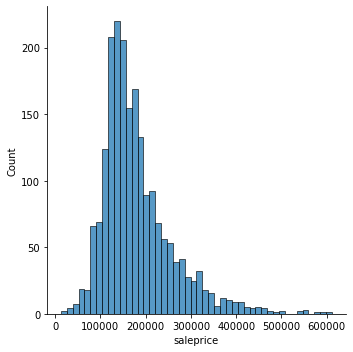

In [10]:
# Lets view how our target variable is distributed

sns.displot(df['saleprice']);

Our target variable is right skewed and asymmetrical so we will have to log transform for modeling purposes in order to use a linear regression model. 

## Normalizing sale price shape/distribution

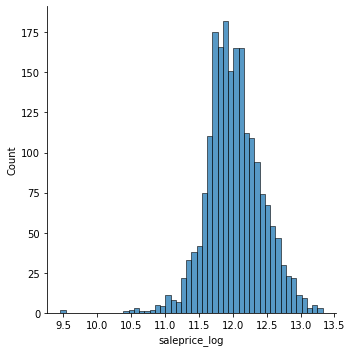

In [11]:
df['saleprice_log'] = np.log(df['saleprice'])

sns.displot(df['saleprice_log']);

## Feature Selection

In [12]:
corr_matrix=df.corr()
corr_matrix.saleprice.sort_values(ascending=False)

saleprice                  1.000000
saleprice_log              0.947066
house_sf_x_overall_qual    0.919239
total_sq_ft                0.825660
overall_qual               0.805112
                             ...   
neighborhood_NAmes        -0.189183
neighborhood_IDOTRR       -0.191092
neighborhood_OldTown      -0.209995
remodel_year              -0.240602
pid                       -0.253221
Name: saleprice, Length: 78, dtype: float64

In [13]:
numeric_train = df.select_dtypes(include=['integer', 'float'])

In [14]:
numeric_train

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,...,exter_cond2,remodel_year,remodel_yn,fireplace_yn,pool_yn,Basement_yn,garage_yn,house_sf_x_overall_qual,overall_qual_x_overall_cond,saleprice_log
0,109,533352170,60,72.0,13517,6,8,1976,2005,289.0,...,3,29,1,0,0,1,1,13224.0,48,11.779129
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,...,3,1,1,1,0,1,1,21245.0,35,12.301383
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,...,4,54,1,0,0,1,1,10570.0,35,11.599103
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,...,3,1,1,0,0,1,1,9140.0,25,12.066811
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,...,3,93,1,0,0,1,1,12726.0,48,11.838626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029,1587,921126030,20,79.0,11449,8,5,2007,2007,0.0,...,3,0,0,1,0,1,1,28896.0,40,12.607366
2030,785,905377130,30,65.0,12342,4,5,1940,1950,0.0,...,3,10,1,0,0,1,1,6888.0,20,11.320554
2031,916,909253010,50,57.0,7558,6,6,1928,1950,0.0,...,3,22,1,1,0,1,1,16854.0,36,12.083905
2032,639,535179160,20,80.0,10400,4,5,1956,1956,0.0,...,3,0,0,1,0,1,1,9600.0,20,11.877569


In [15]:
close_coeffs = numeric_train.corr()['saleprice_log'].sort_values(ascending=False)

In [16]:
feat = close_coeffs[close_coeffs > .5]

In [17]:
feat

saleprice_log                  1.000000
saleprice                      0.947066
house_sf_x_overall_qual        0.878101
overall_qual                   0.825143
total_sq_ft                    0.812438
bsmt_sf_x_qual_2               0.753704
gr_liv_area                    0.705422
exter_qual2                    0.693305
total_baths                    0.672910
garage_cars                    0.668771
bsmt_sf_x_cond2                0.667908
total_bsmt_sf                  0.655022
bsmt_sf                        0.655022
garage_area                    0.654541
additional_area                0.648521
bsmt_qual_2                    0.640467
year_built                     0.624938
1st_flr_sf                     0.624490
overall_qual_x_overall_cond    0.615802
year_remod/add                 0.600272
full_bath                      0.562086
fireplace_yn                   0.505165
Name: saleprice_log, dtype: float64

In [18]:
features = feat.drop(columns=['saleprice_log', 'saleprice'])

In [19]:
features

saleprice_log                  1.000000
saleprice                      0.947066
house_sf_x_overall_qual        0.878101
overall_qual                   0.825143
total_sq_ft                    0.812438
bsmt_sf_x_qual_2               0.753704
gr_liv_area                    0.705422
exter_qual2                    0.693305
total_baths                    0.672910
garage_cars                    0.668771
bsmt_sf_x_cond2                0.667908
total_bsmt_sf                  0.655022
bsmt_sf                        0.655022
garage_area                    0.654541
additional_area                0.648521
bsmt_qual_2                    0.640467
year_built                     0.624938
1st_flr_sf                     0.624490
overall_qual_x_overall_cond    0.615802
year_remod/add                 0.600272
full_bath                      0.562086
fireplace_yn                   0.505165
Name: saleprice_log, dtype: float64

In [20]:
corr_coeffs = numeric_train.corr()['saleprice_log'].sort_values(ascending=False)

In [21]:
feats = ['house_sf_x_overall_qual', 'overall_qual', 'total_sq_ft', 'bsmt_sf_x_qual_2', 'gr_liv_area', 'exter_qual2', 'total_baths', 'garage_cars', 'bsmt_sf_x_cond2', 'total_bsmt_sf', 'additional_area', 'bsmt_qual_2', 'year_built', 'overall_qual_x_overall_cond', 'year_remod/add', 'full_bath', 'fireplace_yn']

In [22]:
extra_feats = ['totrms_abvgrd',
'fireplaces' ,'mas_vnr_area',
'bsmtfin_sf_1',
'neighborhood_NridgHt', 'house_sf_x_overall_qual', 'overall_qual', 'total_sq_ft', 'bsmt_sf_x_qual_2', 'gr_liv_area', 'exter_qual2', 'total_baths', 'garage_cars', 'bsmt_sf_x_cond2', 'total_bsmt_sf', 'additional_area', 'bsmt_qual_2', 'year_built', 'overall_qual_x_overall_cond', 'year_remod/add', 'full_bath', 'fireplace_yn']

## Creating our X and Y variables

In [23]:
X = df[feats]
y = df['saleprice_log']

## Train/Test Split & Scaling

In [24]:
X.shape

(2034, 17)

In [25]:
y.shape

(2034,)

In [26]:
# Splitting our data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)



In [27]:
# Applying standard scaler and fit/transforming our X variable
ss=StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [28]:
# Intiating our regression models
lr = LinearRegression()
ames_lr = LinearRegression()  
ames_ss = StandardScaler()
ames_ridge = Ridge()
ames_lasso = Lasso()

## Selecting and fitting our model

In [29]:
lr.fit(X_train_sc, y_train)

LinearRegression()

## Linear Regression Model

In [30]:
# Evaluating our scores from our Linear Regression model
print(f'Training data R2: {lr.score(X_train_sc, y_train).round(4)}')
print(f'Testing data R2: {lr.score(X_test_sc, y_test).round(4)}')

Training data R2: 0.8765
Testing data R2: 0.8982


In [36]:
# Checking our coeficcients
# we need to use expon
c =np.exp(lr.coef_)
c

array([0.87927955, 1.07625873, 1.07166585, 1.1252778 , 1.14243484,
       1.02251193, 1.04852189, 1.01103034, 1.02939808, 0.97425969,
       1.03098806, 0.98518785, 1.07596073, 1.09260615, 1.0198686 ,
       0.96161823, 1.03516164])

In [44]:
# Checking the cross val score
cross_val_score(lr, X_train, y_train, cv=5).mean()

0.8781245778769922

## Lasso Model

In [45]:
# Using Lasso to fit our model
lasso_model = LassoCV(alphas = np.logspace(-3, 0, 100), cv = 10)
lasso_model = lasso_model.fit(X_train_sc, y_train)
print(f'The best alpha is {lasso_model.alpha_}')
print(f'The score with this model is {lasso_model.score(X_train_sc, y_train)}')
print(f'The test score is {lasso_model.score(X_test_sc, y_test)}')

The best alpha is 0.0011497569953977356
The score with this model is 0.8747250695702958
The test score is 0.8966186573453425


## Ridge Model

In [46]:
# Using Ridge to fit our training data
ridge_model = RidgeCV(alphas = np.logspace(0,5,300), cv = 5)
ridge_model = ridge_model.fit(X_train_sc, y_train)
print(f'The best alpha is {ridge_model.alpha_}')
print(f'The score with this model is {ridge_model.score(X_train_sc, y_train)}')

The best alpha is 5.878016072274912
The score with this model is 0.876242187386561


## Using DIFFERENT FEATURES 

In [47]:
X_2 = df[extra_feats]
y_2 = df['saleprice_log']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, random_state = 42 )

In [49]:
# Applying standard scaler and fit/transforming our X variable
ss=StandardScaler()
X_train_sc_2 = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [50]:
X_train_2 = ames_ss.fit_transform(X_train)

In [51]:
X_test_2 = ames_ss.transform(X_test)

In [52]:
ames_lr.fit(X_train_2, y_train)

LinearRegression()

In [53]:
print(f'Training data R2: {ames_lr.score(X_train_2, y_train).round(3)}')
print(f'Testing data R2: {ames_lr.score(X_test_2, y_test).round(3)}')

Training data R2: 0.882
Testing data R2: 0.902


In [55]:
# Checking the coefficients
ames_c =np.exp(ames_lr.coef_)
ames_c


array([1.00556948, 1.02411631, 0.99831542, 1.04327927, 1.00544919,
       0.87746354, 1.08776253, 1.07307796, 1.08830446, 1.14322035,
       1.02594657, 1.0138731 , 1.0164209 , 1.03182809, 0.97577962,
       1.02336765, 0.99201479, 1.07727328, 1.08608084, 1.0245489 ,
       0.9824991 , 1.01029397])

In [76]:
# Using Lasso to fit our model
lasso_model = LassoCV(alphas = np.logspace(-3, 0, 100), cv = 10)
lasso_model = lasso_model.fit(X_train_2, y_train)
print(f'The best alpha is {lasso_model.alpha_}')
print(f'The score with this model is {lasso_model.score(X_train_2, y_train)}')
print(f'The test score is {lasso_model.score(X_test_2, y_test)}')

The best alpha is 0.0012328467394420659
The score with this model is 0.8801075916950067
The test score is 0.8999796800503964


In [77]:
# Using Ridge to fit our training data
ridge_model = RidgeCV(alphas = np.logspace(0,5,300), cv = 5)
ridge_model = ridge_model.fit(X_train_2, y_train)
print(f'The best alpha is {ridge_model.alpha_}')
print(f'The score with this model is {ridge_model.score(X_train_2, y_train)}')

The best alpha is 7.696399902471157
The score with this model is 0.8816035679154726


# Let's create some plots for our presentation 

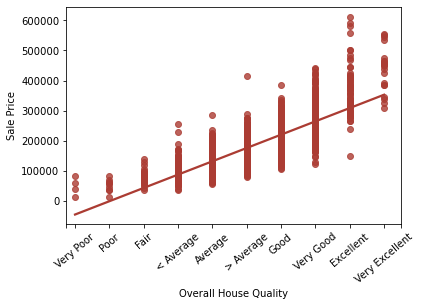

In [148]:
sns.regplot(x='overall_qual', y='saleprice', data=df, ci=None, color='#AB3C33')
plt.xlabel('Overall House Quality')
plt.xticks([.75, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10.5], ['', 'Very Poor', 'Poor', 'Fair', '< Average', 'Average', '> Average', 'Good', 'Very Good', 'Excellent', 'Very Excellent', ''], rotation=40)
plt.ylabel('Sale Price')
plt.show();


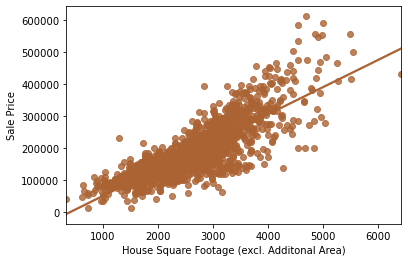

In [188]:
sns.regplot(x='total_sq_ft', y='saleprice', data=df, ci=None, color='#AB6333')
plt.xlabel('House Square Footage (excl. Additonal Area)')
plt.ylabel('Sale Price')
plt.show();

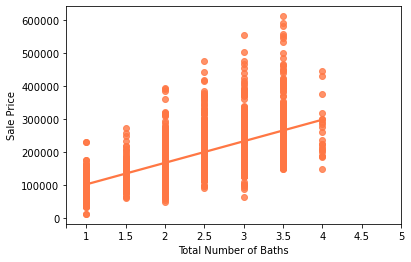

In [186]:
sns.regplot(x='total_baths', y='saleprice', data=df, ci=None, color='#F747')
plt.xlabel('Total Number of Baths')
plt.xticks([.75, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5], ['', '1', '1.5', '2', '2.5', '3', '3.5', '4', '4.5', '5'])
plt.ylabel('Sale Price')
plt.show();

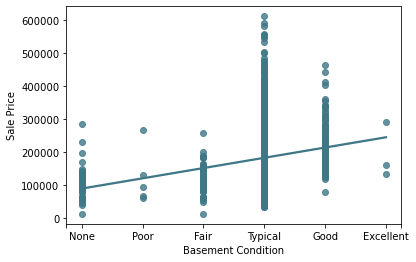

In [158]:

sns.regplot(x='bsmt_cond_2', y='saleprice', data=df, ci=None, color='#3F7787')
plt.xlabel('Basement Condition')
plt.xticks([-.25, 0, 1, 2, 3, 4, 5, 5.25], ['', 'None', 'Poor', 'Fair', 'Typical', 'Good', 'Excellent', ' '])
plt.ylabel('Sale Price')
plt.show();


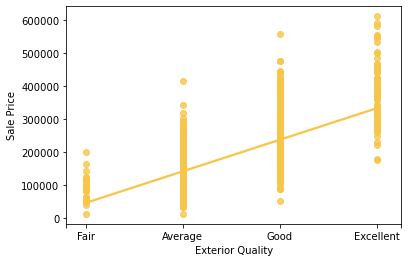

In [164]:
df['exter_qual2'].value_counts()
sns.regplot(x='exter_qual2', y='saleprice', data=df, ci=None, color='#F7C547')
plt.xlabel('Exterior Quality')
plt.xticks([1.8, 2, 3, 4, 5, 5.25], ['', 'Fair', 'Average', 'Good', 'Excellent', ' '])
plt.ylabel('Sale Price')
plt.show();

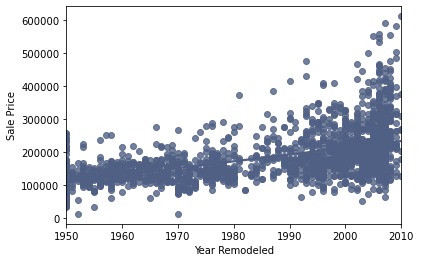

In [171]:
sns.regplot(x='year_remod/add', y='saleprice', data=df, ci=None, color='#506084')
plt.xlabel('Year Remodeled')
plt.ylabel('Sale Price')
plt.show();

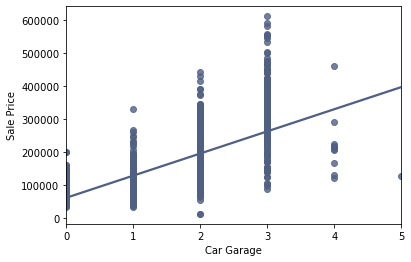

In [174]:
feats

sns.regplot(x='garage_cars', y='saleprice', data=df, ci=None, color='#506084')
plt.xlabel('Car Garage')
plt.ylabel('Sale Price')
plt.show();

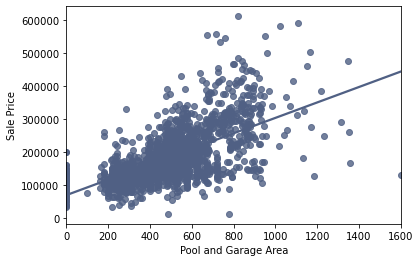

In [177]:
sns.regplot(x='additional_area', y='saleprice', data=df, ci=None, color='#506084')
plt.xlabel('Pool and Garage Area')
plt.ylabel('Sale Price')
plt.show();

## Final Model Evaluation

In [56]:
# Creating a Pipeline
pipe = Pipeline([
    ('poly', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('lcv', LassoCV(0.0011)),
])

/Users/Asia/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass eps=0.0011 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [57]:
# Fitting the training data on the pipeline
pipe.fit(X_train, y_train)

/Users/Asia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02571157866867324, tolerance: 0.018985056393276887
  model = cd_fast.enet_coordinate_descent_gram(
/Users/Asia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03940644490972289, tolerance: 0.02123372865059612
  model = cd_fast.enet_coordinate_descent_gram(
/Users/Asia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03259194187377901, tolerance: 0.02123372865059612
  model = cd_fast.enet_coordinate_descent_gram(
/Users/Asia/opt/anaconda3/lib/python3.8/site-pac

Pipeline(steps=[('poly', PolynomialFeatures()), ('scaler', StandardScaler()),
                ('lcv', LassoCV(eps=0.0011))])

In [58]:
pipe.score(X_test, y_test)

0.9080830937519652

My final model has an $R^2$ score of 0.9, which means about ~90% of the variance in the data can be explained by my model compared to the baseline model.

In [61]:
# Creating residuals 
y_pred = pipe.predict(X_test)

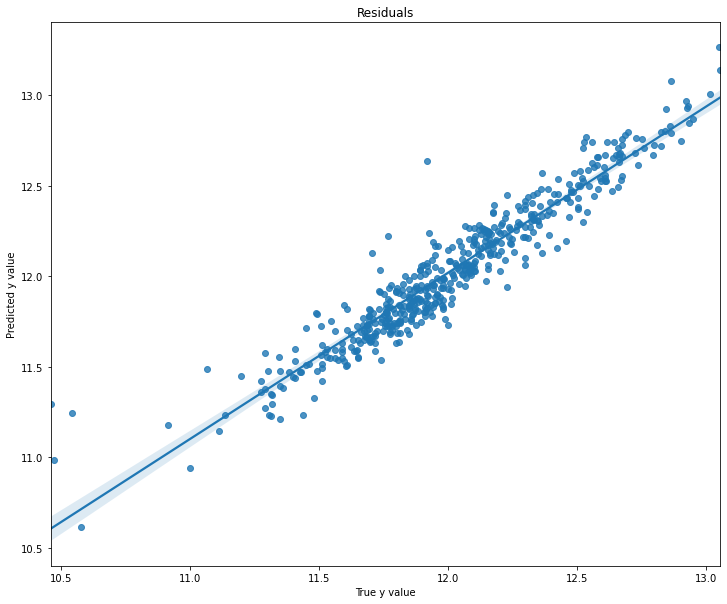

In [62]:
# Lets visualize the residuals
plt.figure(figsize=(12,10))
ax = sns.regplot(x=y_test, y=y_pred)
ax.set_xlabel('True y value')
ax.set_ylabel('Predicted y value')
ax.set_title('Residuals');

/Users/Asia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


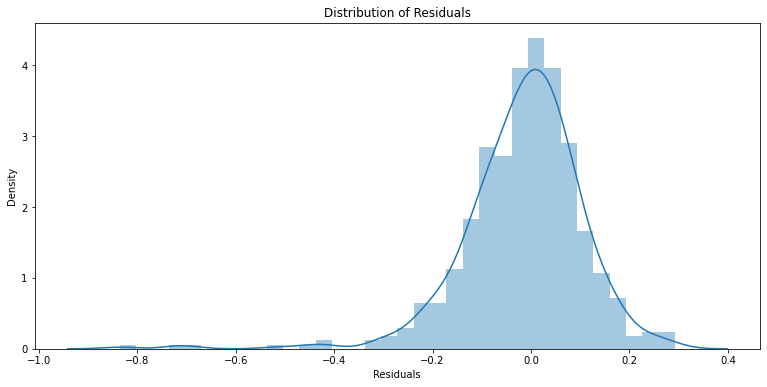

In [63]:
residuals = y_test - y_pred

plt.figure(figsize=(13, 6))
ax = sns.distplot(residuals)
ax.set_xlabel('Residuals')
ax.set_title('Distribution of Residuals');

## Calculating RMSE and MSE

In [64]:
# calculating RMSE
metrics.mean_squared_error(y_test, y_pred) **.5

0.12347804071151354

In [65]:
residuals[0:10]

611     0.045046
111     0.072013
1185   -0.007626
1510   -0.052239
771    -0.149614
879    -0.093158
591    -0.111189
1366   -0.126227
1177    0.013881
275    -0.105641
Name: saleprice_log, dtype: float64

In [66]:
# Calculating MSE
metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)

0.015246826537954195

0.12573221948821534

In [67]:
df[['saleprice', 'saleprice_log']]

,saleprice,saleprice_log
0,130500.0,11.779129
1,220000.0,12.301383
2,109000.0,11.599103
3,174000.0,12.066811
4,138500.0,11.838626
...,...,...
2029,298751.0,12.607366
2030,82500.0,11.320554
2031,177000.0,12.083905
2032,144000.0,11.877569


In [95]:
df['saleprice'].mean()

180558.02802359883